In [4]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import re
import requests
import json
import seaborn

# QUESTION 2 

# FIRST SUBPART  

## 2.1.1 NUMBER OF VOTES VS AGGREGATE RATING

In [14]:
# I have used the concept of data compression in solving the given question , the values 
# of number of votes can be large . So to get them in range , I have divided them with the total 
# restaurant count , so as to get a proper reading under the given range . It is evident that 
# The aggregate rating of 4-4.5 has the maximum number of votes .

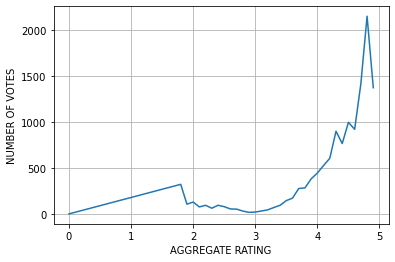

In [15]:
df = pd.read_csv("zomato.csv" , encoding = 'ISO-8859-1')
# print(zomato_df.shape)
# Only Indian Restaurants
df = df[df['Country Code']==1] 

df['Rating with Votes'] = df['Aggregate rating'].astype(str) + '___' + df['Votes'].astype(str)


range_with_votes = {}

def get_counts(rating_and_votes):
    rating = round(float(rating_and_votes.split("___")[0]),2)
    votes = int(float(rating_and_votes.split("___")[1]))
    if rating not in range_with_votes:
        range_with_votes[rating] = [votes,1]
    else:
        range_with_votes[rating][0]+=votes
        range_with_votes[rating][1]+=1
    

df['Rating with Votes'].apply(get_counts)

total_votes_rating = [[key,value[0]//value[1]] for key,value in range_with_votes.items()]

# for i in range_with_votes:
#     print(i , range_with_votes[i])

total_votes_rating.sort()
total_votes = [i[1] for i in total_votes_rating]
rating = [i[0] for i in total_votes_rating]

plt.plot(rating,total_votes)
plt.xlabel("AGGREGATE RATING")
plt.ylabel("NUMBER OF VOTES")
plt.grid()
plt.show()

## 2.1.2 RESTAURANT SERVING MORE NUMBER OF CUISINES 

In [ ]:
# Here i have used the same concept of data compression to get the values in range . Hence I have done 
# total_rating/restaurant count .  After ploting the detail in the graph we can notice
# the higher number of cuisines offered more is the rating. 60 - 80 range has got the higher ratings. But still there are
# some restaurants after offering ample number of cuisines still they couldn't get good rating. So it will be better to
# go with more number cuisines offered by a restaurant. 

In [7]:
ratings = np.array(df['Aggregate rating'])
cuisines = np.array(df['Cuisines'])
cui_v_rating = {}

for i in range(len(ratings)):
    nCuisine = len(cuisines[i])
    if nCuisine not in cui_v_rating:
        cui_v_rating[nCuisine] = [[ratings[i]] , 1]
    else:
        cui_v_rating[nCuisine][0].append(ratings[i]) ##the aggregate rating part
        cui_v_rating[nCuisine][1] += 1


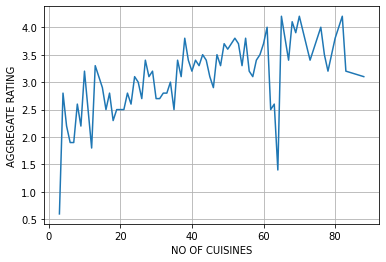

In [19]:
cuisine_avg = [] ## data compression part 
for key , value in cui_v_rating.items():
    avg_rating = round(sum(value[0])/value[1] , 1)
    cuisine_avg.append([key , avg_rating])
cuisine_avg.sort(reverse = True)
cuisine_avg_x = [i[0] for i in cuisine_avg]
cuisine_avg_y = [i[1] for i in cuisine_avg]
plt.plot(cuisine_avg_x , cuisine_avg_y)
plt.grid()
plt.xlabel("NO OF CUISINES")
plt.ylabel("AGGREGATE RATING")
plt.show()

# 2.1.3 AVERAGE COST OF RESTAURANT 

In [18]:
# Again , the same principle of data compression , total_aggregate_rating/Total_restaurant_count. 
# Using the previously calculated values . On observation it has been found out that when the cost 
# for two is more than 1000 , the rating is generally between 3 to 4 , maximum rating was observed 
# for the restaurants having cost for 2 in between 600 - 7000

In [9]:
ratings = np.array(df['Aggregate rating'])
cost_for_2 = np.array(df['Average Cost for two'])
cost_v_rating = {}

for i in range(len(ratings)):
#     nCuisine = len(cuisines[i])
    if cost_for_2[i] not in cost_v_rating:
        cost_v_rating[cost_for_2[i]] = [[ratings[i]] , 1]
    else:
        cost_v_rating[cost_for_2[i]][0].append(ratings[i]) ##the aggregate rating part
        cost_v_rating[cost_for_2[i]][1] += 1


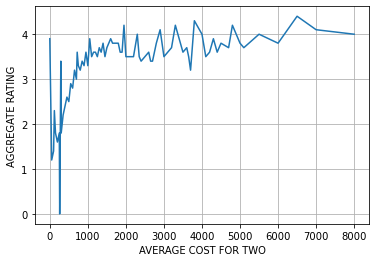

In [20]:
cost_avg = []

for key, value in cost_v_rating.items():
    avg_rating = round(sum(value[0])/value[1] , 1)
    cost_avg.append([key , avg_rating])
cost_avg.sort(reverse = True)
cost_avg_x = [i[0] for i in cost_avg]
cost_avg_y = [i[1] for i in cost_avg]
plt.plot(cost_avg_x , cost_avg_y)
plt.grid()
plt.xlabel("AVERAGE COST FOR TWO")
plt.ylabel("AGGREGATE RATING")
plt.show()

# 2.1.4 RESTAURANTS SERVING SOME SPECIFIC NUMBER OF CUISINES

In [21]:
# The same technique used as before , did not make any function specifically 
# got the average rating by dividing total rating with restaurant count to get an averaged rating . 
# On plottting it has been discovered that the persian cuisine has highest number of rating while 
# vietnamese has ranked 20 , I have plotted the graph for top 20 cuisines .

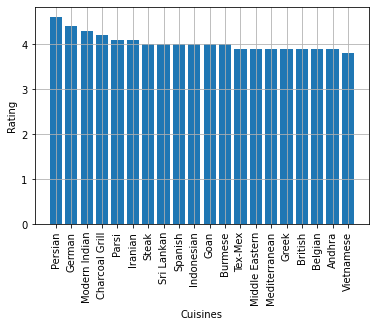

In [31]:
cuisines_with_rating = {} 
ratings = np.array(df['Aggregate rating'])
cuisines = np.array(df['Cuisines'])

for i in range(len(cuisines)):
    cuisine_list = cuisines[i].split(', ')
    for cuisine in cuisine_list:
        if cuisine not in cuisines_with_rating:
            cuisines_with_rating[cuisine] = [[ratings[i]],1]
        else:
            cuisines_with_rating[cuisine][0].append(ratings[i])
            cuisines_with_rating[cuisine][1]+=1

cuisines_ratings = [ [round(sum(value[0])/value[1],1),key] for key,value in cuisines_with_rating.items()]

cuisines_ratings.sort(reverse=True)
cuisines = []
ratings = []
for i in cuisines_ratings:
    cuisines.append(i[1])
    ratings.append(i[0])

plt.bar(cuisines[0:20],ratings[0:20])
plt.xticks(rotation=90)
plt.xlabel("Cuisines")
plt.ylabel("Rating")

plt.grid()
plt.show()

# 2.2.1 WEIGHTED AVERAGE RATING

In [23]:
# For getting the weighted I have mapped locality with product of votes and ratings amd no of votes 
# explicitly . then divided the sum of product of votes and ratings with sum of number of votes . 
# on observation it has been found out that the top 10 localities for food are :
# 1 Hotel Clarks Amer, Malviya Nagar
# 2 Aminabad
# 3 Friends Colony
# 4 Powai
# 5 Kirlampudi Layout
# 6 Express Avenue Mall,  Royapettah
# 7 Deccan Gymkhana
# 8 Banjara Hills
# 9 Sector 5, Salt Lake
# 10 Riverside Mall, Gomti Nagar

In [24]:
localities = np.array(df['Locality'])
restaurants = np.array(df['Restaurant Name']) 
ratings = np.array(df['Aggregate rating'])
votes = np.array(df['Votes'])

dict_ = {}
for i in range(len(localities)):
    if votes[i]!=0:
        if localities[i] not in dict_:
            dict_[localities[i]] = [votes[i]*ratings[i],votes[i]]
        else:
            dict_[localities[i]][0] += votes[i]*ratings[i]
            dict_[localities[i]][1] += votes[i]

  



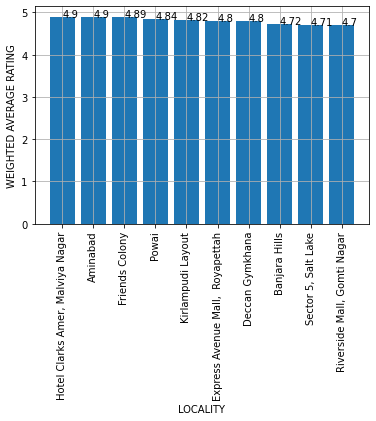

In [32]:
total_avg = []
for key , value in dict_.items():
    wrat = round(value[0]/value[1] , 2)
    total_avg.append([wrat , key])
    
total_avg.sort(reverse = True)

_x = [i[1] for i in total_avg][0:10]
_y = [i[0] for i in total_avg][0:10]

plt.bar(_x,_y)
plt.xticks(rotation = "90")
plt.xlabel("LOCALITY")
plt.ylabel("WEIGHTED AVERAGE RATING")
plt.grid()
for index , value in enumerate(_y):
    plt.text(index  , value  , str(value))
plt.show()
    
    
    